Block diagramimage="steps_block_diagram.png"
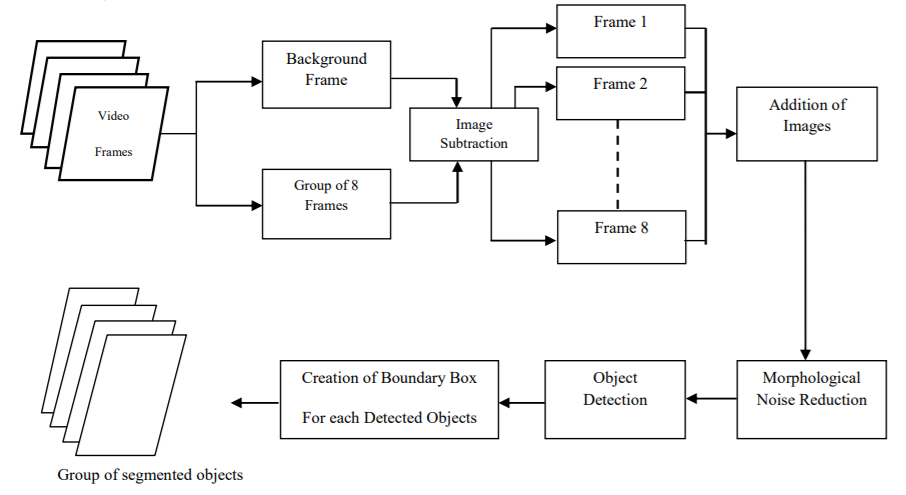

## Package Requirements

In [ ]:
!pip3 install opencv-python
!pip3 install scikit-image
!pip3 install tqdm
!pip3 install ipywidgets
!pip3 install dlib!pip3 install face_recognition


In [23]:
!pip3 install dlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.3/11.8 MB 3.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/11.8 MB 6.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.5/11.8 MB 8.6 MB/s eta 0:00:02
     --------- ------------------------------ 2.7/11.8 MB 11.4 MB/s eta 0:00:01
     ------------- -------------------------- 3.9/11.8 MB 14.7 MB/s eta 0:00:01
     ----------------- ---------------------- 5.2/11.8 MB 16.7 MB/s eta 0:00:01
     ----------------- ---------------------- 5.2/11.8 MB 16.7 MB/s eta 0:00:01
     -------------------- ------------------- 6.1/11.8 MB 14.4 MB/s eta 0:00:01
     -------------------------- ------------- 7.9/11.8 MB 17.5 MB/s eta 0:00:01
     --------------------------------- ------ 9.8/11.8 MB 1

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [72 lines of output]
  running bdist_wheel
  running build
  running build_ext
  <string>:125: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  Building extension for Python 3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]
  Invoking CMake setup: 'cmake C:\Users\justi\AppData\Local\Temp\pip-install-eos0o9n0\dlib_bd2e8e140a634501b6d9ceeacdbefbd0\tools\python -DCMAKE_LIBRARY_OUTPUT_DIRECTORY=C:\Users\justi\AppData\Local\Temp\pip-install-eos0o9n0\dlib_bd2e8e140a634501b6d9ceeacdbefbd0\build\lib.win-amd64-cpython-311 -DPYTHON_EXECUTABLE=C:\Users\justi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -DCMAKE_LIBRARY_OUTPUT_DIRECTORY_RELEASE=C:\Users\justi\AppData\Local\Temp\pip-install-eos0o9n0\dlib_bd2e8e140a634501b6d9ceeacdbefbd0\build\lib.win-amd64-cpython-311 -A x64'
  -- Building for: Visual Studio 17 

### Import Software Packages

In [24]:
import numpy as np
import cv2
from skimage import data, filters
import face_recognition

ModuleNotFoundError: No module named 'face_recognition'

### Implementation

In [7]:
#Background Estimation
bkTime = 100

# Open Video
print("Video Camera: Initiating" )
cap = cv2.VideoCapture(0)
if cap.isOpened():
    print("Initiate Video Camera: Completed")

    # Store selected frames in an array
    def calcuate_median_frame(cap, bkTime):
        frames = []   
        for i in range(bkTime): 
            ret, frame = cap.read()
            frames.append(frame)
                
        # Calculate the median along the time axis
        medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)        
        
        return medianFrame
    
    # Display median frame
    cmf = calcuate_median_frame(cap, bkTime)
    cv2.imshow('Calcuated Median Frame', cmf)
    cv2.waitKey(0)
    
    #Convert the Median frame into gray color
    cmf = grayMedianFrame = cv2.cvtColor(cmf, cv2.COLOR_BGR2GRAY)
    
    # Loop over all frames to detect frame differencing
    ret = True
    while(cap.isOpened()):
     
        # Read frame
        ret, frame = cap.read()
    
        if ret == True:     
            orig_frame = frame.copy()
               
            # Convert current frame to grayscale
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
            # Calculate absolute difference of current frame and the median frame
            dframe = cv2.absdiff(frame, cmf)
        
            # thresholding to convert the frame to binary
            ret, thres = cv2.threshold(dframe, 50, 255, cv2.THRESH_BINARY)
        
            # dilate the frame a bit to get some more white area makes the detection of contours a bit easier
            dilate_frame = cv2.dilate(thres, None, iterations=2)

            canny = cv2.Canny(dilate_frame, 30, 200)
    
            # find the contours around the white segmented areas
            contours, hierarchy = cv2.findContours(dilate_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
            # draw the contours
            for i, cnt in enumerate(contours):
                cv2.drawContours(frame, contours, i, (0, 0, 255), 3)
                
            for contour in contours:
                 # continue through the loop if contour area is less than 500 helps in removing noise detection
                 if cv2.contourArea(contour) < 500:
                     continue
                 # get the xmin, ymin, width, and height coordinates from the contours
                 (x, y, w, h) = cv2.boundingRect(contour)
                 # draw the bounding boxes
                 cv2.rectangle(orig_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
            # Display image
            cv2.imshow('frame differencing: Frame differencing', dilate_frame) 
            cv2.imshow('frame differencing: Edge detection', canny)
            cv2.imshow('frame differencing: Final detection', orig_frame) 
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
          
    # Release video object
    cap.release()
     
    # Destroy all windows
    cv2.destroyAllWindows()

Video Camera: Initiating
Initiate Video Camera: Completed
